### HW6Q3

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from numpy import linalg as LA
import json
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
# define a plot function
def plot(num_trees, train_error, valid_error):
    fig = plt.figure(figsize=(9,6))
    plt.plot(range(10, num_trees), train_error, label="Train Error")
    plt.plot(range(10, num_trees), valid_error, label="Valid Error")
    plt.legend()
    plt.xlabel("Number of Trees", fontsize=10)
    plt.ylabel("Error Rate", fontsize=10)
    plt.title("Error Rate vs Number of Trees", fontsize=15)
    plt.show()

In [4]:
data=np.float64(np.load('/project2/cmsc25025/mnist/MNIST.npy'))
labels=np.float32(np.load('/project2/cmsc25025/mnist/MNIST_labels.npy'))

In [5]:
data = data/255
x_train, x_valid, x_test = data[:50000,:], data[50000:60000,:], data[60000:, :]
y_train, y_valid, y_test = labels[:50000], labels[50000:60000], labels[60000:]

In [8]:
# define a plot function
num_trees = 100
def plot(num_trees, train_error, valid_error):
    fig = plt.figure(figsize=(9,6))
    plt.plot(range(10, num_trees), train_error, label="Train Error")
    plt.plot(range(10, num_trees), valid_error, label="Valid Error")
    plt.legend()
    plt.xlabel("Number of Trees", fontsize=10)
    plt.ylabel("Error Rate", fontsize=10)
    plt.title("Error Rate vs Number of Trees", fontsize=15)
    plt.show()

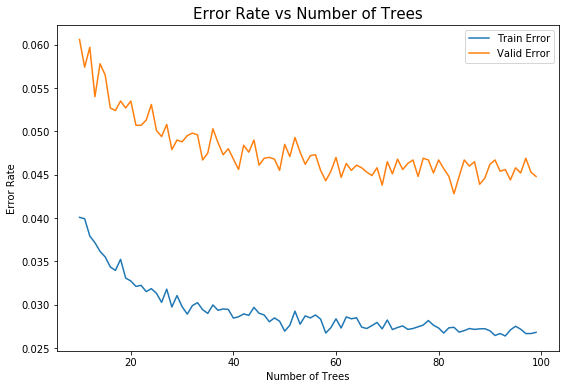

In [6]:
# a). experiment with random forest classifier 
# min samples split
num_trees = 100
train_err = np.zeros(num_trees)
valid_err = np.zeros(num_trees)
for i in range(10, num_trees):
    clf = RandomForestClassifier(n_estimators=i, min_samples_split=50,criterion="entropy")
    clf.fit(x_train, y_train)
    train_err[i] = np.mean(y_train != clf.predict(x_train))
    valid_err[i] = np.mean(y_valid != clf.predict(x_valid))
plot(num_trees, train_err[10:], valid_err[10:])

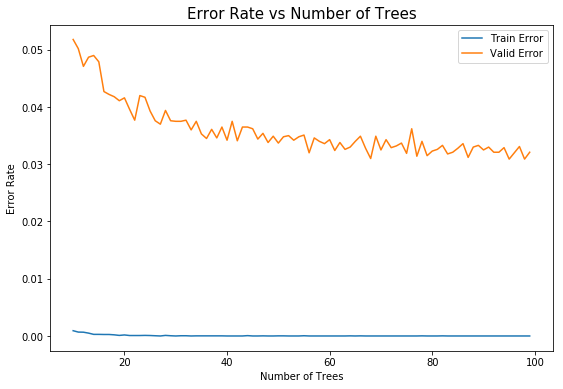

In [15]:
# n estimators 
train_err = np.zeros(num_trees)
valid_err = np.zeros(num_trees)
for i in range(10, num_trees):
    clf = RandomForestClassifier(n_estimators=i,criterion="entropy")
    clf.fit(x_train, y_train)
    train_err[i] = np.mean(y_train != clf.predict(x_train))
    valid_err[i] = np.mean(y_valid != clf.predict(x_valid))
plot(num_trees, train_err[10:], valid_err[10:])

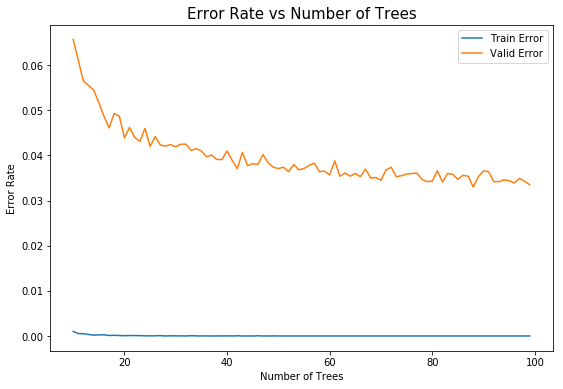

In [9]:
# max features
train_err = np.zeros(num_trees)
valid_err = np.zeros(num_trees)
for i in range(10, num_trees):
    clf = RandomForestClassifier(n_estimators=i, max_features=10,criterion="entropy")
    clf.fit(x_train, y_train)
    train_err[i] = np.mean(y_train != clf.predict(x_train))
    valid_err[i] = np.mean(y_valid != clf.predict(x_valid))
plot(num_trees, train_err[10:], valid_err[10:])

In [22]:
clf = RandomForestClassifier(n_estimators=68, max_features=28,criterion="entropy")
clf.fit(x_train, y_train)
print('test error:', round(np.mean(y_test != clf.predict(x_test)),4))

test error: 0.0284


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


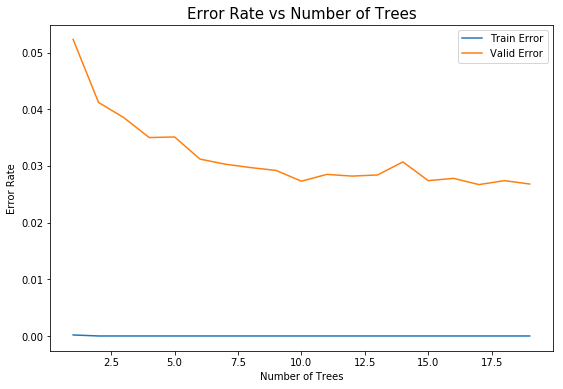

In [6]:
# b). Implements SAMME (AdaBoostClassifier)
# min samples split
num_trees = 20
train_err = np.zeros(num_trees)
valid_err = np.zeros(num_trees)
for i in range(1, num_trees):
    print(i)
    clfb = RandomForestClassifier(n_estimators=i, min_samples_split=50,criterion="entropy")
    clf = AdaBoostClassifier(clfb, algorithm='SAMME')
    clf.fit(x_train, y_train)
    train_err[i] = np.mean(y_train != clf.predict(x_train))
    valid_err[i] = np.mean(y_valid != clf.predict(x_valid))
plot(num_trees, train_err[1:], valid_err[1:])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


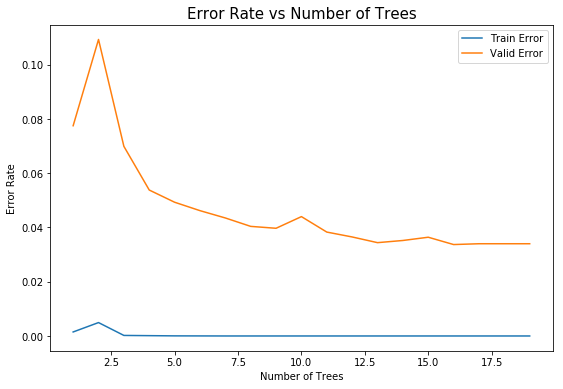

In [7]:
# n estimators 
train_err1 = np.zeros(num_trees)
valid_err1 = np.zeros(num_trees)
for i in range(1, num_trees):
    print(i)
    clfb = RandomForestClassifier(n_estimators=i, criterion="entropy")
    clf = AdaBoostClassifier(clfb, n_estimators=10, algorithm='SAMME')
    clf.fit(x_train, y_train)
    train_err1[i] = np.mean(y_train != clf.predict(x_train))
    valid_err1[i] = np.mean(y_valid != clf.predict(x_valid))
plot(num_trees, train_err1[1:], valid_err1[1:])

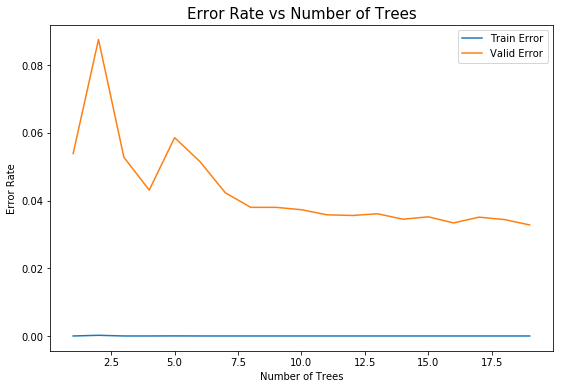

In [8]:
# max features
train_err = np.zeros(num_trees)
valid_err = np.zeros(num_trees)
for i in range(1, num_trees):
    clfb = RandomForestClassifier(n_estimators=i, max_features=10,criterion="entropy")
    clf = AdaBoostClassifier(clfb, algorithm='SAMME')
    clf.fit(x_train, y_train)
    train_err[i] = np.mean(y_train != clf.predict(x_train))
    valid_err[i] = np.mean(y_valid != clf.predict(x_valid))
plot(num_trees, train_err[1:], valid_err[1:])

The train errors are both low for random forest classfiers and Adaboost classifiers. However, the AdaBoostclassifier decreases the error in the validation set from 5% to 3%, and it decreases slightly if the stopping criterion is the max number of features. This decrease in error is not observed when the stopping criterion is the number of trees. 